# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyp
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# DATA READING

In [2]:
data = pd.read_csv('loan_approval_dataset.csv')
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [3]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# DATA WRANGLING

In [4]:
data.columns = data.columns.str.lstrip()

In [5]:
data.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [6]:
data.drop('loan_id',axis=1,inplace=True)

In [7]:
data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [8]:
data[['education', 'self_employed']] = data[['education', 'self_employed']].apply(lambda x: x.str.lstrip())

In [9]:
data.education[0]

'Graduate'

In [10]:
data.loan_status[0]

' Approved'

In [11]:
data.loan_status = data.loan_status.str.lstrip()

In [12]:
data.loan_status[0]

'Approved'

In [13]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [14]:
pd.options.display.float_format = '{:.2f}'.format

# DATA ANALYSING

In [15]:
data.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.00,4269.00,4269.00,4269.00,4269.00,4269.00,4269.00,4269.00,4269.00
mean,2.50,5059123.92,15133450.46,10.90,599.94,7472616.54,4973155.31,15126305.93,4976692.43
std,1.70,2806839.83,9043362.98,5.71,172.43,6503636.59,4388966.09,9103753.67,3250185.31
min,0.00,200000.00,300000.00,2.00,300.00,-100000.00,0.00,300000.00,0.00
25%,1.00,2700000.00,7700000.00,6.00,453.00,2200000.00,1300000.00,7500000.00,2300000.00
50%,3.00,5100000.00,14500000.00,10.00,600.00,5600000.00,3700000.00,14600000.00,4600000.00
75%,4.00,7500000.00,21500000.00,16.00,748.00,11300000.00,7600000.00,21700000.00,7100000.00
max,5.00,9900000.00,39500000.00,20.00,900.00,29100000.00,19400000.00,39200000.00,14700000.00


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4269 non-null   int64 
 1   education                 4269 non-null   object
 2   self_employed             4269 non-null   object
 3   income_annum              4269 non-null   int64 
 4   loan_amount               4269 non-null   int64 
 5   loan_term                 4269 non-null   int64 
 6   cibil_score               4269 non-null   int64 
 7   residential_assets_value  4269 non-null   int64 
 8   commercial_assets_value   4269 non-null   int64 
 9   luxury_assets_value       4269 non-null   int64 
 10  bank_asset_value          4269 non-null   int64 
 11  loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


# ENCODING STRING DATA INTO UNIQUE VALUES

In [17]:
data['loan_status']  = LabelEncoder().fit_transform(data['loan_status'])

In [18]:
data['loan_status'].unique()

array([0, 1])

In [19]:
data['education'] = LabelEncoder().fit_transform(data['education'])

In [20]:
data.education.unique()

array([0, 1])

In [21]:
data['self_employed'] = LabelEncoder().fit_transform(data['self_employed'])

In [22]:
data['self_employed'].unique()

array([0, 1])

In [23]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [24]:
data.loan_status.value_counts()

0    2656
1    1613
Name: loan_status, dtype: int64

In [25]:
data.loan_status.corr(data.no_of_dependents)

0.018114422862177675

# DEPENDENT FEATURES CO-RELATION

In [26]:
for cols in data.columns[:-1]:
    print(data['loan_status'].corr(data[cols]))

0.018114422862177675
0.004917865960694138
-0.00034450753494376244
0.015189156991943615
-0.016149683925315923
0.11303578494915408
-0.7705183649807021
0.014366514535999294
-0.008245868278426237
0.015464711194809477
0.006778439800372121


In [27]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   no_of_dependents          4269 non-null   int64
 1   education                 4269 non-null   int32
 2   self_employed             4269 non-null   int32
 3   income_annum              4269 non-null   int64
 4   loan_amount               4269 non-null   int64
 5   loan_term                 4269 non-null   int64
 6   cibil_score               4269 non-null   int64
 7   residential_assets_value  4269 non-null   int64
 8   commercial_assets_value   4269 non-null   int64
 9   luxury_assets_value       4269 non-null   int64
 10  bank_asset_value          4269 non-null   int64
 11  loan_status               4269 non-null   int32
dtypes: int32(3), int64(9)
memory usage: 350.3 KB


# MACHINE LEARNING ALGORTHM

# LOGISTIC REGRESSION

In [29]:
xtrain,xtest,ytrain,ytest = train_test_split(data[['no_of_dependents','education','self_employed','income_annum',\
                      'loan_amount','loan_term','cibil_score','residential_assets_value',\
                      'commercial_assets_value','luxury_assets_value',\
                      'bank_asset_value',]],data['loan_status'],test_size=0.1)

# DATA TRAINING AND TESTING

In [30]:
perm = linear_model.LogisticRegression()

In [31]:
perm.fit(xtrain,ytrain)

LogisticRegression()

In [32]:
xtest

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1648,1,1,1,1300000,5000000,4,610,3400000,800000,4500000,900000
2727,2,0,1,9100000,34800000,20,836,21300000,10900000,30600000,9900000
3242,1,0,0,2100000,4200000,12,379,2700000,2100000,8100000,2500000
925,5,0,0,3000000,8000000,6,333,3200000,400000,8200000,2200000
340,2,1,0,6800000,23500000,12,341,19300000,11800000,14300000,8500000
...,...,...,...,...,...,...,...,...,...,...,...
1111,0,0,0,1400000,5000000,8,686,1800000,1900000,3200000,1500000
358,0,0,1,8200000,20800000,14,372,3800000,100000,26100000,5200000
1679,4,0,0,1600000,5500000,10,577,400000,1200000,4100000,1400000
1148,2,0,0,7300000,20000000,6,729,13100000,10700000,17900000,9100000


In [33]:
hold_result = perm.predict(xtest)
hold_result

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [34]:
data.iloc[xtest.index[0],:]

no_of_dependents                  1
education                         1
self_employed                     1
income_annum                1300000
loan_amount                 5000000
loan_term                         4
cibil_score                     610
residential_assets_value    3400000
commercial_assets_value      800000
luxury_assets_value         4500000
bank_asset_value             900000
loan_status                       0
Name: 1648, dtype: int64

In [35]:
for cols in data.columns[:-1]:
    print(data['loan_status'].corr(data[cols]))

0.018114422862177675
0.004917865960694138
-0.00034450753494376244
0.015189156991943615
-0.016149683925315923
0.11303578494915408
-0.7705183649807021
0.014366514535999294
-0.008245868278426237
0.015464711194809477
0.006778439800372121


# DATA TRAINING AND TESTING ON CONCEPTS GAINED BY DATA ANALYSING

In [36]:
xtemptrain,xtemptest,ytemptrain,ytemptest = train_test_split(data[['cibil_score']],\
                                                             data['loan_status'],test_size=0.1)

In [37]:
temp = linear_model.LogisticRegression()

In [38]:
temp.fit(xtemptrain,ytemptrain)

LogisticRegression()

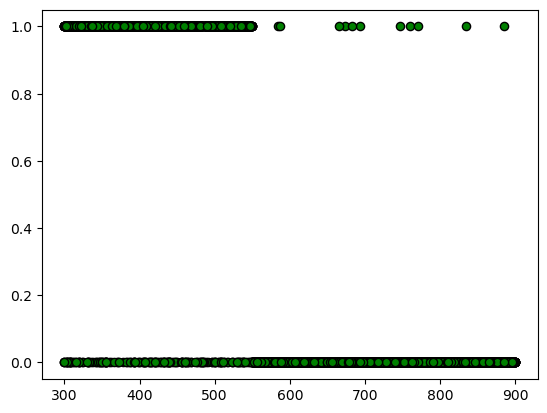

In [50]:
pyp.scatter(xtemptrain,ytemptrain,edgecolor='black',s=35,color='g')
pyp.show()

In [40]:
xtemptest

,cibil_score
4234,837
4200,377
858,337
4242,643
89,641
...,...
2873,446
3435,439
4120,711
188,622


In [41]:
xtemptest.values

array([[837],
       [377],
       [337],
       [643],
       [641],
       [871],
       [781],
       [622],
       [418],
       [639],
       [750],
       [625],
       [561],
       [576],
       [707],
       [634],
       [859],
       [364],
       [461],
       [787],
       [845],
       [646],
       [437],
       [522],
       [861],
       [618],
       [877],
       [562],
       [428],
       [476],
       [333],
       [892],
       [320],
       [308],
       [495],
       [603],
       [685],
       [711],
       [411],
       [551],
       [715],
       [839],
       [504],
       [524],
       [325],
       [728],
       [742],
       [488],
       [527],
       [408],
       [835],
       [420],
       [873],
       [752],
       [664],
       [439],
       [819],
       [454],
       [314],
       [794],
       [664],
       [737],
       [584],
       [571],
       [800],
       [819],
       [878],
       [645],
       [570],
       [597],
       [551],
      

In [42]:
y_pred = temp.predict(xtemptest)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,

In [70]:
holder = data[data['cibil_score']>600].iloc[:,-1]
holder

0       0
6       0
8       0
13      0
15      0
       ..
4253    0
4261    0
4263    0
4267    0
4268    0
Name: loan_status, Length: 2125, dtype: int32

In [71]:
np.unique(holder,return_counts=True)

(array([0, 1]), array([2114,   11], dtype=int64))

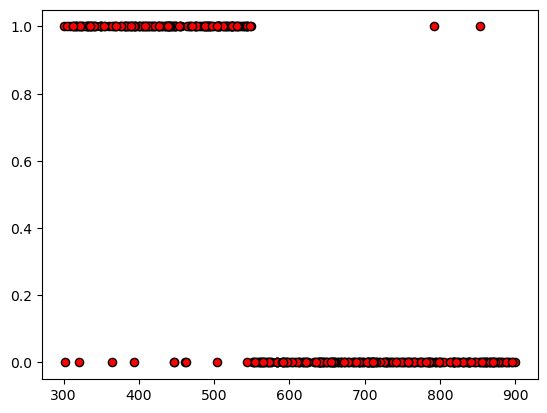

In [72]:
pyp.scatter(xtemptest,ytemptest,edgecolor='black',s=35,color='r')
pyp.show()

In [43]:
xtemptest.index

Int64Index([4234, 4200,  858, 4242,   89, 3266, 1107,  606,  628,  979,
            ...
            1285, 2953, 2259,  625,  857, 2873, 3435, 4120,  188,  792],
           dtype='int64', length=427)

In [44]:
data.iloc[xtemptest.index[0],:]

no_of_dependents                  3
education                         1
self_employed                     1
income_annum                1500000
loan_amount                 5100000
loan_term                        14
cibil_score                     837
residential_assets_value    4100000
commercial_assets_value     1000000
luxury_assets_value         3300000
bank_asset_value            1400000
loan_status                       0
Name: 4234, dtype: int64

In [45]:
xtest.index

Int64Index([1648, 2727, 3242,  925,  340, 3487, 1326, 4059,  460,  249,
            ...
            1612, 2167, 2834, 2489, 2878, 1111,  358, 1679, 1148, 1203],
           dtype='int64', length=427)

In [46]:
arr = []
for i in xtest.index:
    arr.append(temp.predict(data.iloc[i,6].reshape(1,-1)))
arr = np.array(arr)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid

In [110]:
arr_ = np.unique(arr,return_counts=True)[1]
arr_

array([273, 154], dtype=int64)

In [48]:
np.unique(hold_result,return_counts=True)

(array([0, 1]), array([359,  68], dtype=int64))

In [76]:
hold = np.unique(hold_result,return_counts=True)[1]
hold

array([359,  68], dtype=int64)

# MACHINE LEARNING MODEL VS DATA ANALYSING VIA CORELATIONS

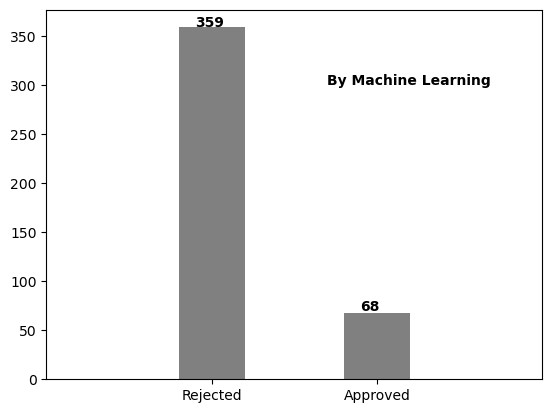

In [122]:
pyp.xlim(-1,2)
pyp.bar(['Rejected','Approved'],hold,color='grey',width=0.4)
ax = pyp.gca()
ax.text(-0.1,360,hold[0],weight='bold')
ax.text(0.9,70,hold[1],weight='bold')
ax.text(0.7,300,'By Machine Learning',weight='bold')
pyp.show()

In [112]:
arr_

array([273, 154], dtype=int64)

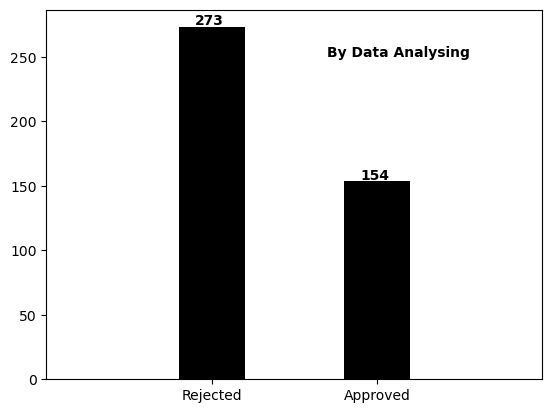

In [121]:
pyp.xlim(-1,2)
pyp.bar(['Rejected','Approved'],arr_,color='black',width=0.4)
ax = pyp.gca()
ax.text(-0.1,275,arr_[0],weight='bold')
ax.text(0.9,155,arr_[1],weight='bold')
ax.text(0.7,250,'By Data Analysing',weight='bold')
pyp.show()

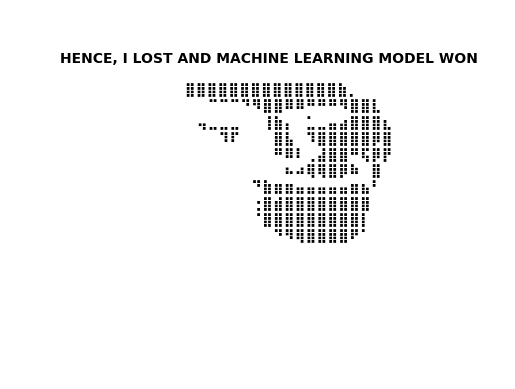

In [166]:
pyp.xlim(-1,2)
pyp.bar([0,100,200],[0,100,200],color='w')
pyp.xticks([]),pyp.yticks([])
pyp.tick_params(bottom = False, left = False)
ax = pyp.gca()
for location in ["left","right","bottom","top"]:
    ax.spines[location].set_visible(False)
ax.text(-0.7,180,'HENCE, I LOST AND MACHINE LEARNING MODEL WON',weight='bold')
ax.text(0,70,'''

  ⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⡀⠀
⠀⠀⠀⠉⠉⠉⠙⠻⣿⣿⠿⠿⠛⠛⠛⠻⣿⣿⣇⠀
⠀⠀⢤⣀⣀⣀⠀⠀⢸⣷⡄⠀⣁⣀⣤⣴⣿⣿⣿⣆
⠀⠀⠀⠀⠹⠏⠀⠀⠀⣿⣧⠀⠹⣿⣿⣿⣿⣿⡿⣿
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠛⠿⠇⢀⣼⣿⣿⠛⢯⡿⡟
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠦⠴⢿⢿⣿⡿⠷⠀⣿⠀
⠀⠀⠀⠀⠀⠀⠀⠙⣷⣶⣶⣤⣤⣤⣤⣤⣶⣦⠃⠀
⠀⠀⠀⠀⠀⠀⠀⢐⣿⣾⣿⣿⣿⣿⣿⣿⣿⣿⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠈⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⠻⢿⣿⣿⣿⣿⠟⠁
''',weight='bold')
pyp.show()